# Visualization

Using the heart-attack.csv example below, fill in the code blocks for a new dataset, auto-mpg

The first step is to download the auto-mpg data set (auto-mpg.data and auto-mpg.names) from UCI: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG

In this file, replace gender with origin and age with mpg

Rename this file lab0-visualization-auto_mpg.ipynb and submit your GitHub link to D2L

## Resources
1. Ch 9 in Python for Data Analysis, 2nd Ed, Wes McKinney (UCalgary library and https://github.com/wesm/pydata-book)
2. Ch 4 in Python Data Science Handbook, Jake VanderPlas (Ucalgary library and https://github.com/jakevdp/PythonDataScienceHandbook)
3. Fundamentals of Data Visualization, Claus O. Wilke (Ucalgary library and https://serialmentor.com/dataviz/index.html)
4. Overview by Jake VanderPlas https://www.youtube.com/watch?v=FytuB8nFHPQ

## Matplotlib
> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.  
Matplotlib tries to make easy things easy and hard things possible.  
For simple plotting the pyplot module provides a MATLAB-like interface

https://matplotlib.org

Importing matplotlib looks like this

In [2]:
!conda info --envs

# conda environments:
#
                         /Users/samuelsofela/opt/anaconda3
base                  *  /Users/samuelsofela/opt/anaconda3/envs/ensf-ml



In [20]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Two interfaces
There are two ways to interact with Matplot lib: a Matlab style and an object oriented style interface.

See Ch 4 in Python Data Science Handbook, Jake VanderPlas

- Two Interfaces for the Price of One, pp. 222
- Matplotlib Gotchas, pp. 232

## Plotting with pandas
> We use the standard convention for referencing the matplotlib API ...
> We provide the basics in pandas to easily create decent looking plots. 

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Let's load the required dataset:

In [4]:
# Replace code below with code to load auto-mpg dataset
# Hint: Use attribute information from website to determine column names
# Hint: Load with na_values = '?' and sep=r'\s+'
#column_names is used to create a list of column headers 
#names=column_names is used to set the headers 
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
data = pd.read_csv('auto-mpg.data', na_values='?',sep = r'\s+', names = column_names)

Plotting all columns, works, but does not provide a lot of insight.

<AxesSubplot: >

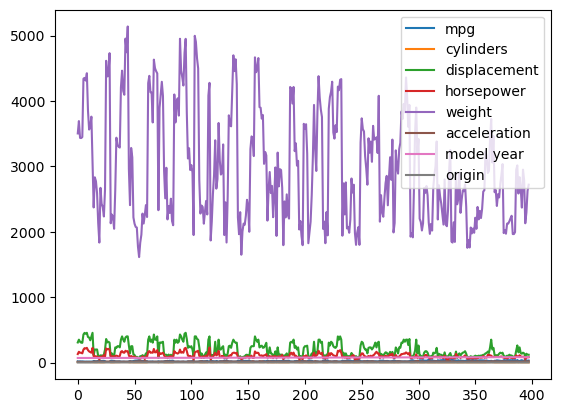

In [5]:
data.plot()

Let's look at one distribution (a histogram)

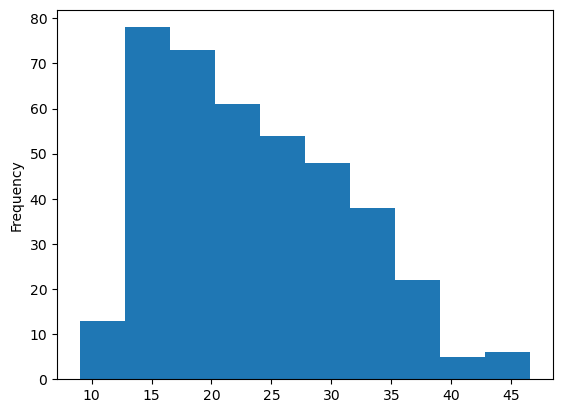

In [67]:
# Replace variables to correspond to auto-mpg dataset
data['mpg'].plot.hist();

How many samples do we have for each origin?

In [12]:
# Replace variables to correspond to auto-mpg dataset
#using the origin columns
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

Notice that we accessed the cylinders column with dot notation. This can be done whenever the column name is 'nice' enough to be a python variable name.

  Plotting multiple histograms directly from the dataframe:

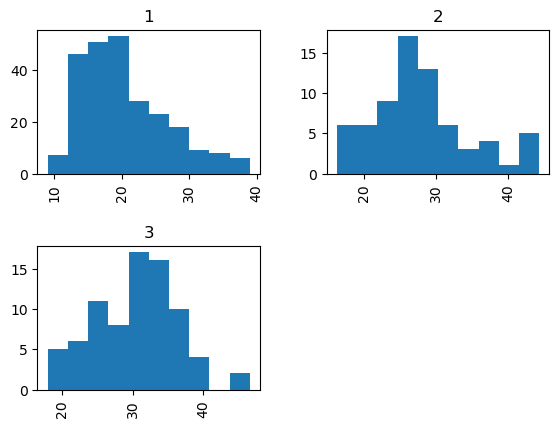

In [68]:
# Replace variables to correspond to auto-mpg dataset
axs = data.hist(column='mpg', by='origin')

To format this plot, we can work on the axes (array) that is returned by the plot call. We use Matplotlib object oriented interface methods to do this

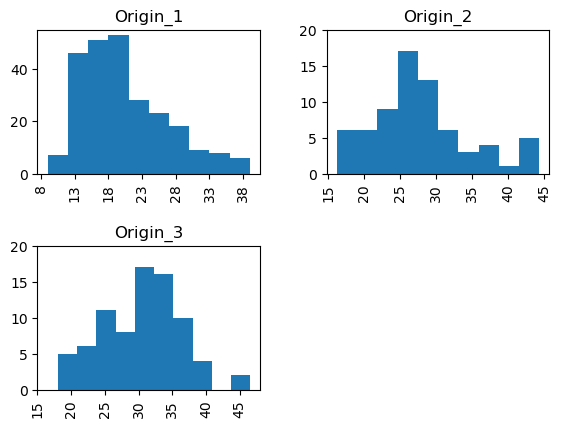

In [76]:
# Replace variables to correspond to auto-mpg dataset
axs = data.hist(column='mpg', by='origin')
axs[0,0].set(title='Origin_1', ylim=[0, 55], xticks = np.arange(8,40,5))
axs[0,1].set(title='Origin_2', ylim=[0, 20], xticks = np.arange(15,50,5))
axs[1,0].set(title='Origin_3', ylim=[0, 20], xticks = np.arange(15,50,5));

Are mpg and weight correlated? Maybe it is for different origins?
Let's have a look with a scatter plot.

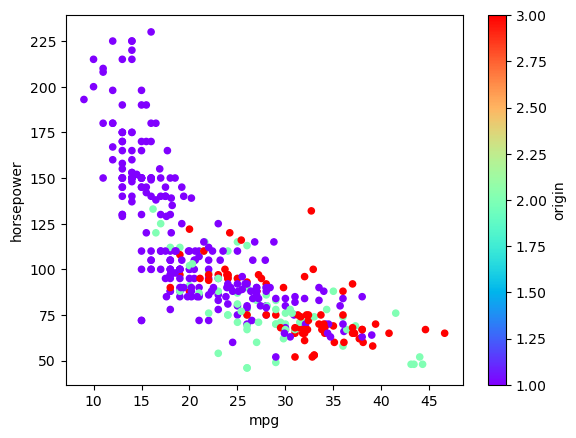

In [77]:
# Replace variables to correspond to auto-mpg dataset
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='rainbow');

According to:  
https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels

the missing x-labels are a pandas bug.

Workaraound is to create axes prior to calling plot

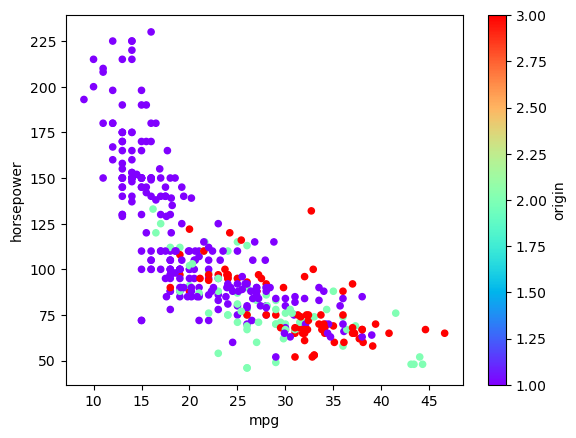

In [78]:
# Replace variables to correspond to auto-mpg dataset
fig, ax = plt.subplots()
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='rainbow', ax=ax);

It is a bit annoying that there is a colorbar, as we know the origin is categorical.

One way to avoid the colorbar is to loop over the categories and assign colors based on the category.

See:
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

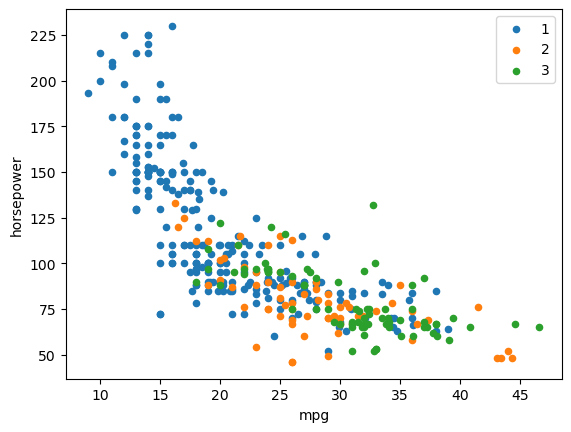

In [79]:
# Replace variables to correspond to auto-mpg dataset
colors = {1: 'tab:blue', 2: 'tab:orange',3: 'tab:green'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('mpg', 'horsepower', c=colors[key], label=key, ax=ax);

## Seaborn 
>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

http://seaborn.pydata.org/index.html

Seaborn is usually imported as `sns`

In [29]:
import seaborn as sns

Let's re-create the histograms with seaborn with the figure level `displot()` function.

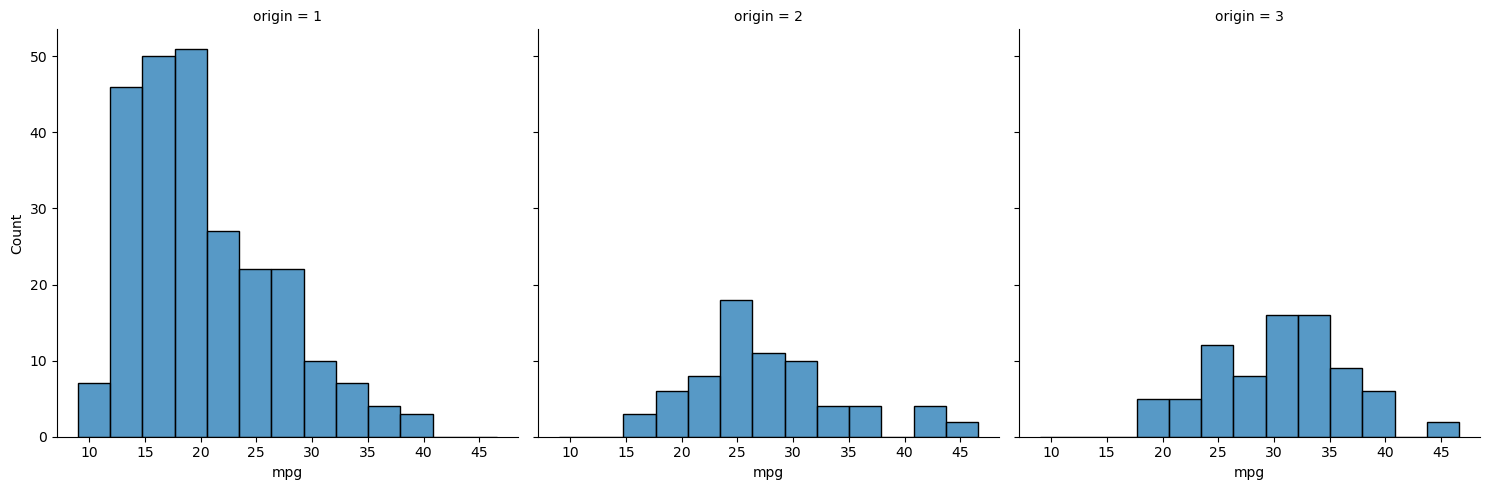

In [80]:
# Replace variables to correspond to auto-mpg dataset
sns.displot(x='mpg', col='origin', data=data);

We can display the counts in the same plot, one on top of the other.

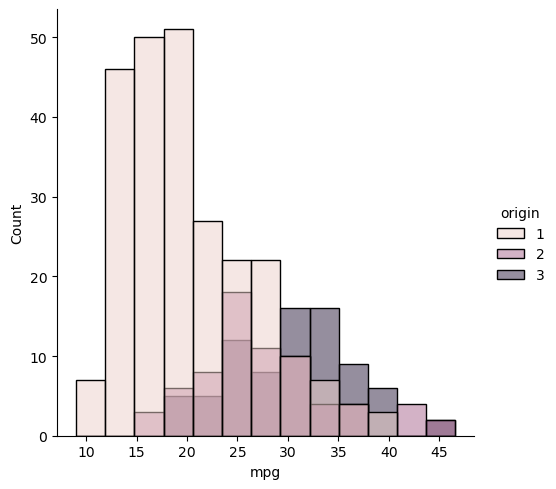

In [81]:
# Replace variables to correspond to auto-mpg dataset
sns.displot(x='mpg', hue='origin', data=data);

To have an idea of the split between origins, we can stack the counts, adding up to total.

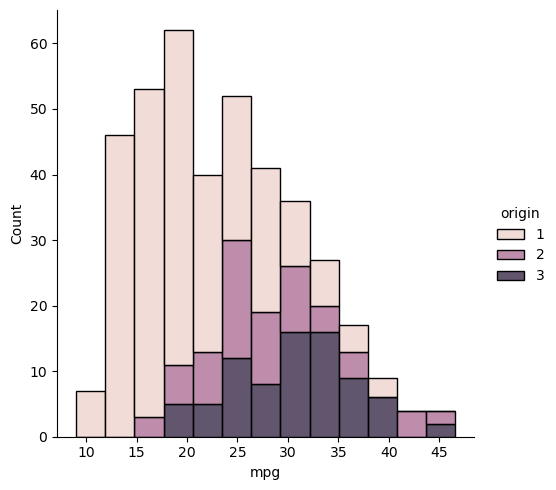

In [82]:
# Replace variables to correspond to auto-mpg dataset
sns.displot(x='mpg', hue='origin', data=data, multiple='stack');

We can look at the differences with a boxplot too

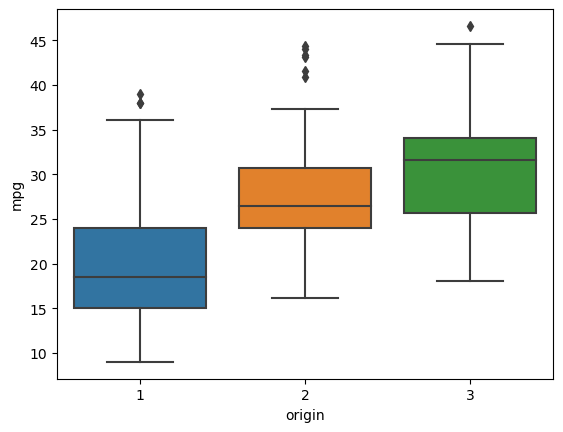

In [83]:
# Replace variables to correspond to auto-mpg dataset
sns.boxplot(x='origin', y='mpg', data=data);

Let's re-create the scatter plot

To make the legend show strings we will create an origin string column with origin_1, origin_2 and origin_3 strings rather than 1, 2 or 3.

In [84]:
# Replace variables to correspond to auto-mpg dataset
data['origin_str'] = data['origin'].replace([1,2,3], ['Origin_1', 'Origin_2','Origin_3'])

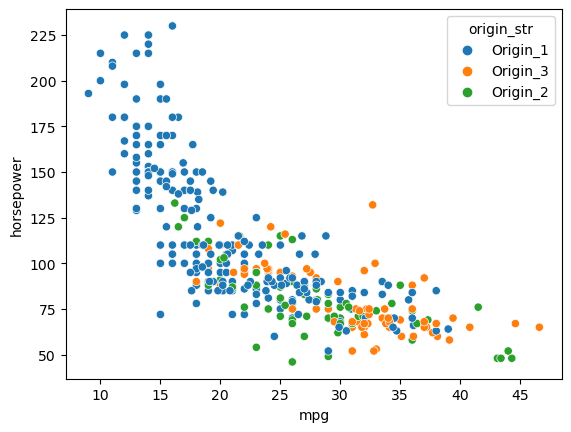

In [85]:
# Replace variables to correspond to auto-mpg dataset
ax = sns.scatterplot(x='mpg', y='horsepower', data=data, hue='origin_str')

Adding a regression line helps with visualizing the relationship

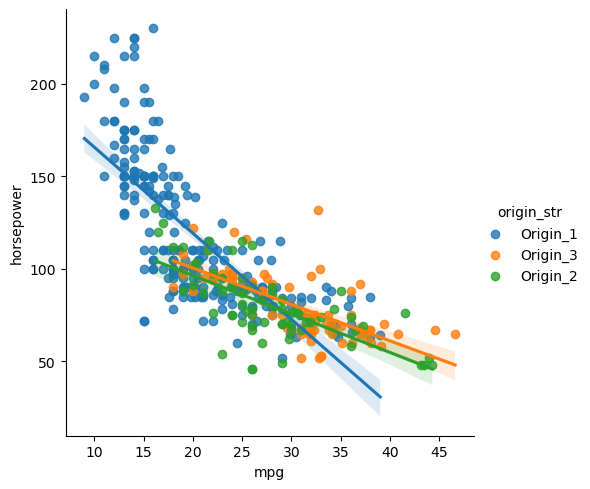

In [86]:
# Replace variables to correspond to auto-mpg dataset
ax = sns.lmplot(x='mpg', y='horsepower', data=data, hue='origin_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

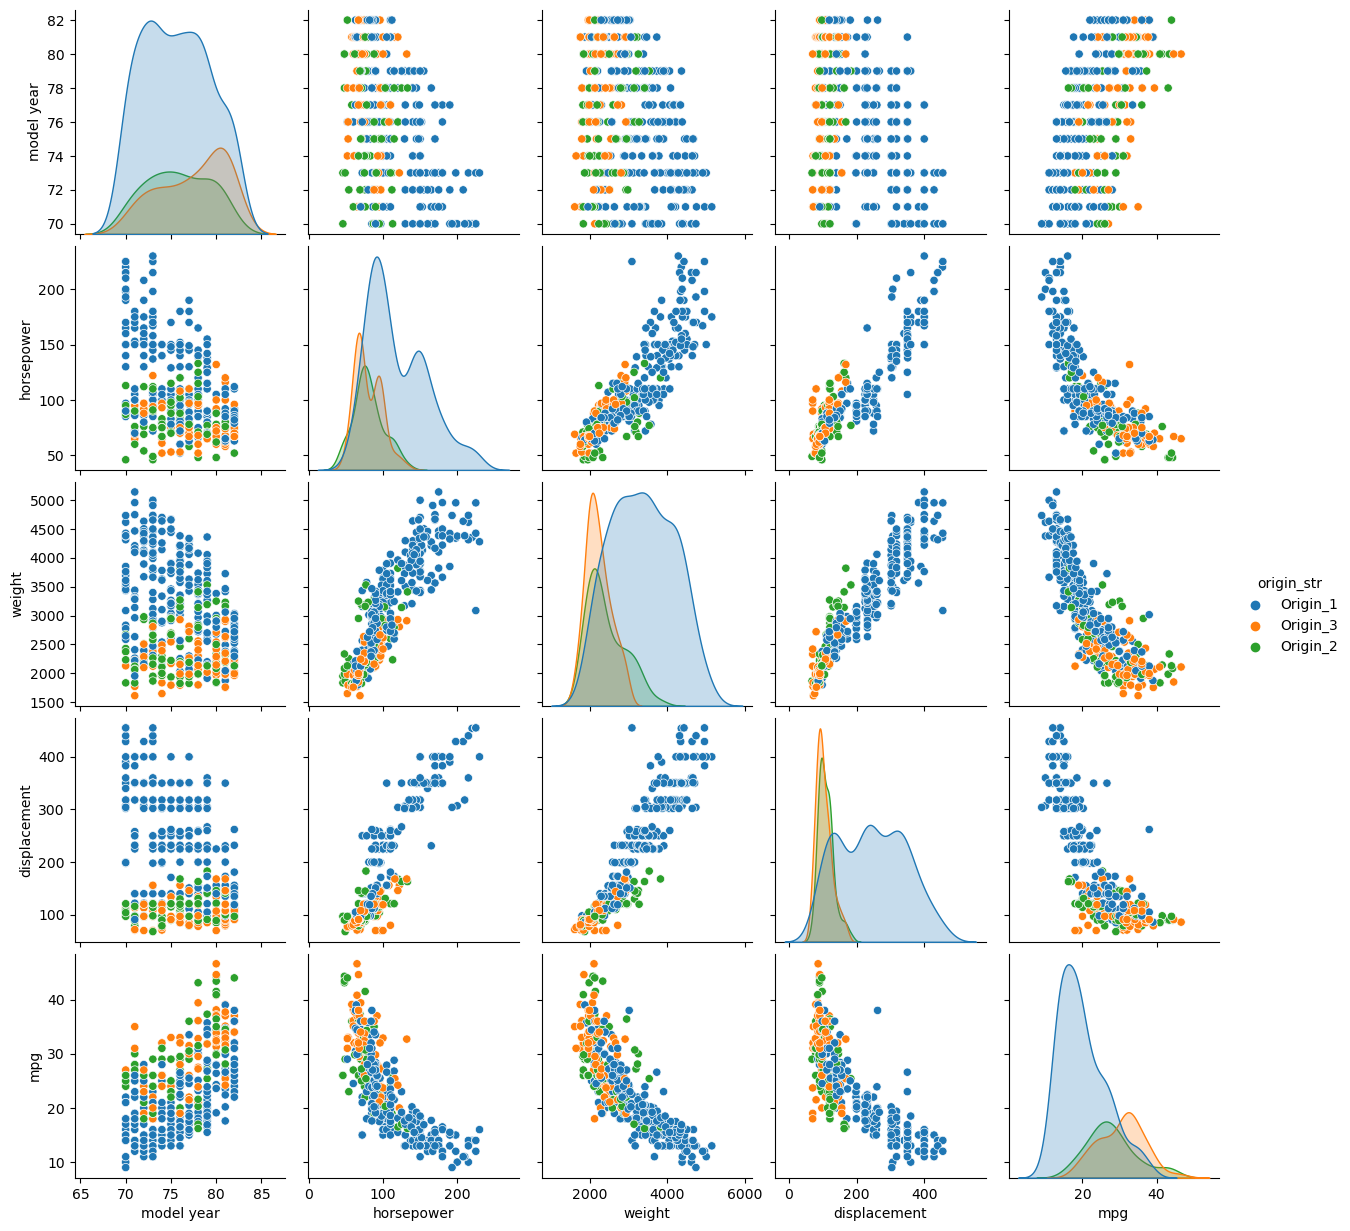

In [87]:
# Replace variables to correspond to auto-mpg dataset
sns.pairplot(data, vars=['model year', 'horsepower', 'weight', 'displacement', 'mpg'], hue='origin_str');

As an alternative, we can visualize the correlation matrix as a heatmap

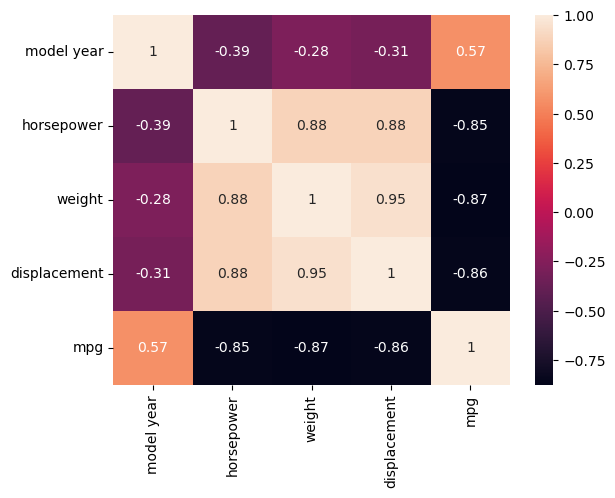

In [50]:
# Replace variables to correspond to auto-mpg dataset
g = sns.heatmap(data[['model year', 'horsepower', 'weight', 'displacement', 'mpg']].corr(method='spearman'), 
            annot=True)

If you need any help, check out the tutorials on the Seaborn website